In [ ]:
# @title

"""

"""


# Classwork

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

## Data Understanding

In [3]:
train=pd.read_csv("train (1).csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

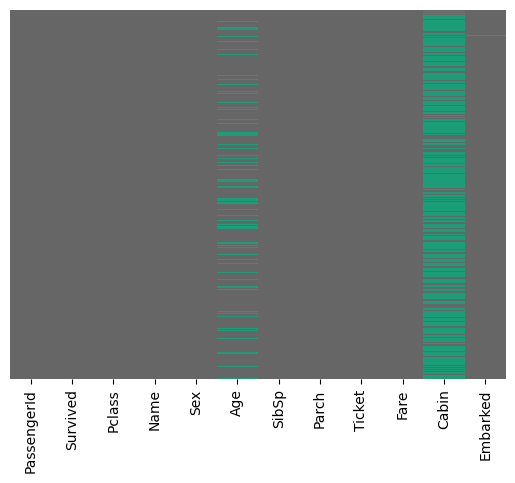

In [7]:
import seaborn as sns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [8]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

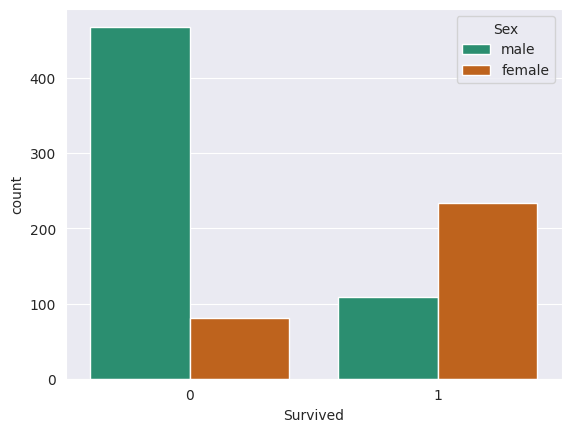

In [9]:
#count-plot of people survided
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='Dark2')

<ipython-input-12-4b4cd5bac9c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( train['Sex'], ax=ax[1],palette='Dark2').set_title('Gender distribution')


Text(0.5, 1.0, 'Gender distribution')

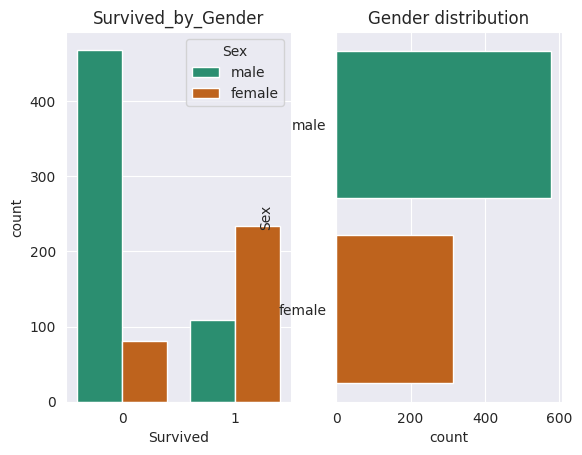

In [12]:
fig, ax = plt.subplots(1, 2)
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train,ax=ax[0],palette='Dark2').set_title('Survived_by_Gender')
sns.countplot( train['Sex'], ax=ax[1],palette='Dark2').set_title('Gender distribution')

<ipython-input-13-9de9fc44bdd7>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))


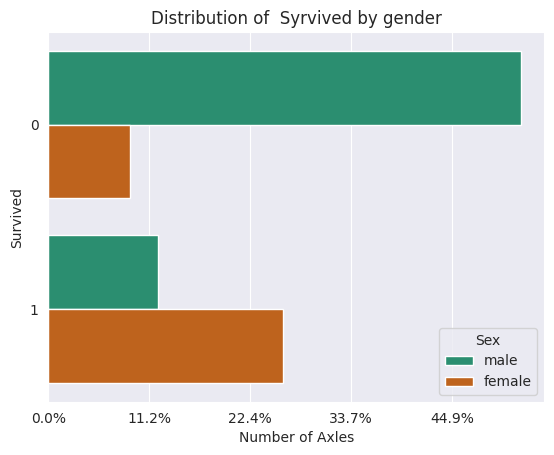

In [13]:
total = len(train['Survived'])*1.
ax = sns.countplot(y=train['Survived'], hue=train['Sex'],palette='Dark2')
plt.title('Distribution of  Syrvived by gender')
plt.xlabel('Number of Axles')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

Text(0.5, 1.0, 'Survived_by_Pclass')

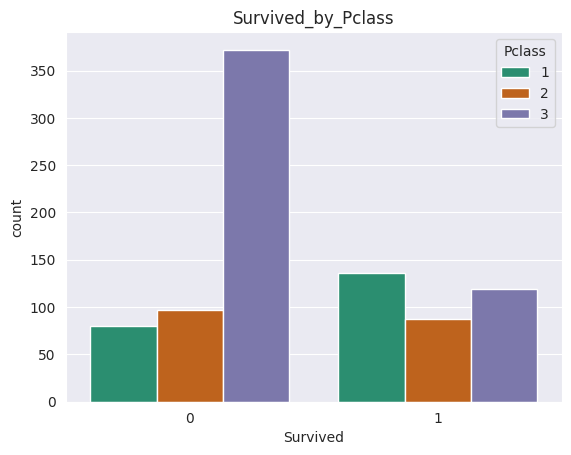

In [14]:
#no. of people who survived according to their Passenger Class
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=train,palette='Dark2').set_title('Survived_by_Pclass')

<ipython-input-15-8e2949696807>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=True, bins=30, color='Green').set_title('distribition_of_age')


Text(0.5, 1.0, 'distribition_of_age')

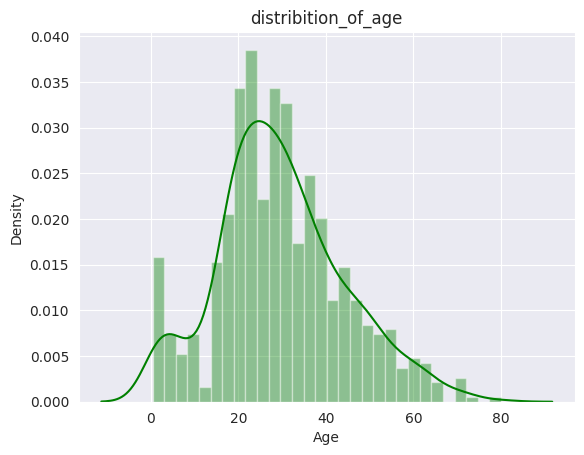

In [15]:
#distribution plot of age of the people
sns.distplot(train['Age'].dropna(), kde=True, bins=30, color='Green').set_title('distribition_of_age')

<ipython-input-16-144821528905>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='Dark2').set_title('How many siblings do passengers on board have?')


Text(0.5, 1.0, 'How many siblings do passengers on board have?')

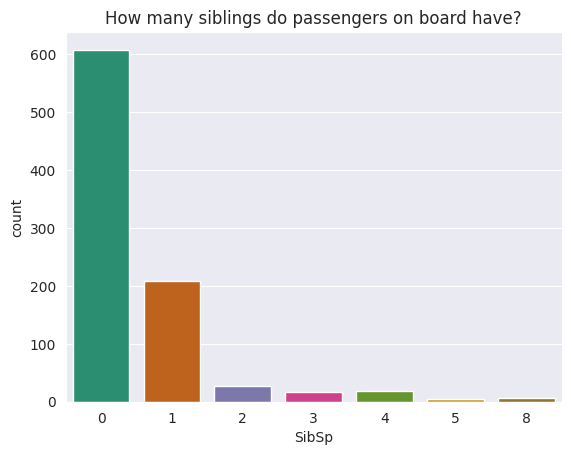

In [16]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train,palette='Dark2').set_title('How many siblings do passengers on board have?')

Text(0.5, 1.0, 'Distribition_of_Fare')

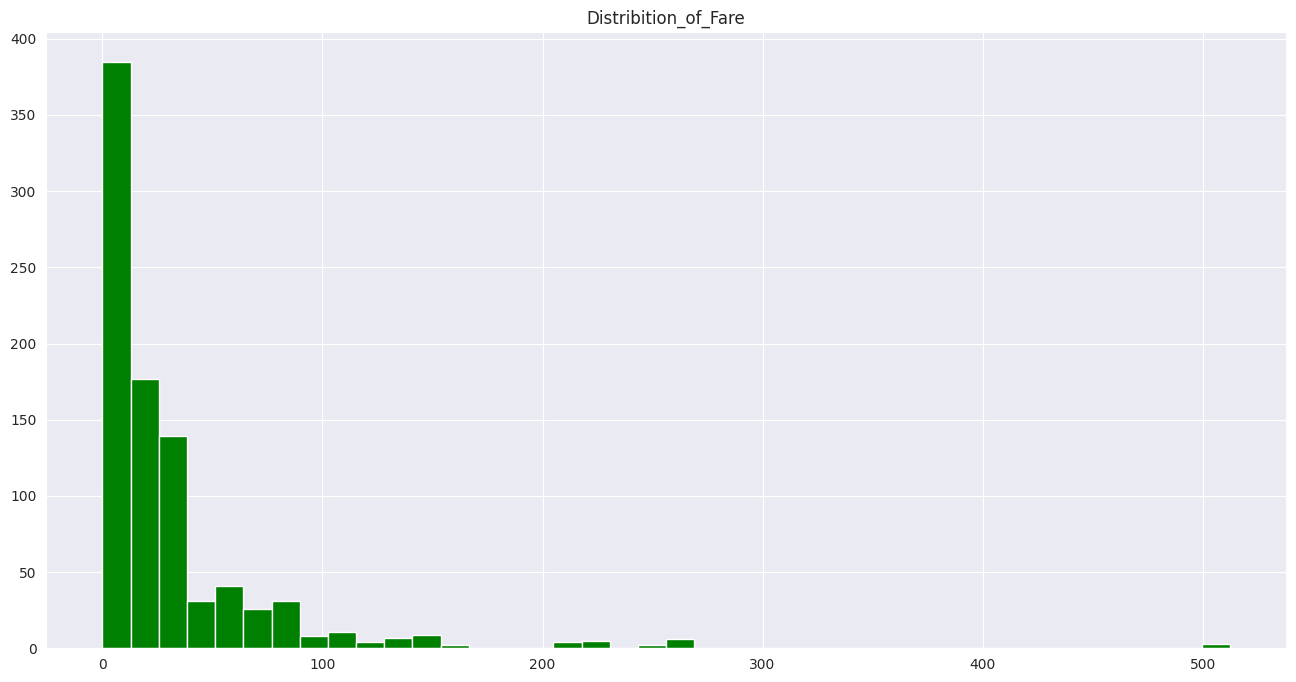

In [17]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(16,8)).set_title('Distribition_of_Fare')

<ipython-input-18-7b41af2eb9b7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='Dark2').set_title('Age_distribition_acording_to_pclass')


Text(0.5, 1.0, 'Age_distribition_acording_to_pclass')

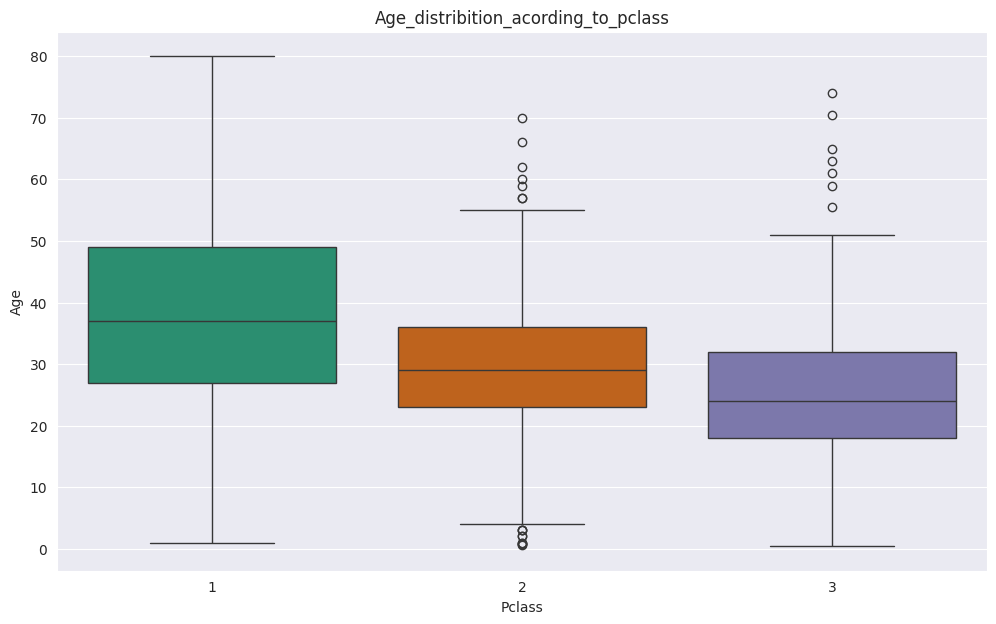

In [18]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.boxplot(x='Pclass',y='Age',data=train,palette='Dark2').set_title('Age_distribition_acording_to_pclass')

## Data Preperation

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-19-04a14ba475b9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-19-04a14ba475b9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

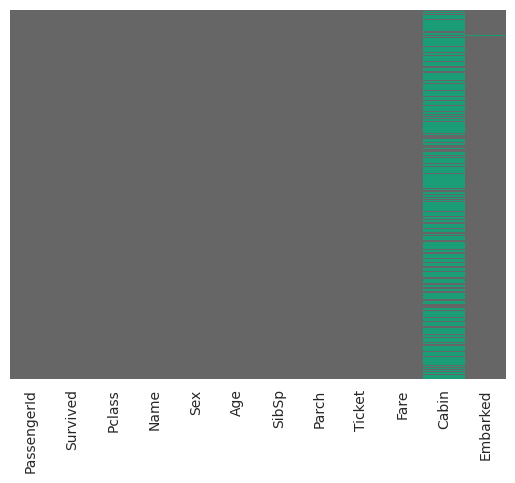

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [22]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [24]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
           train['Survived'], test_size=0.30,
            random_state=101)

## Modelling

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [26]:
#predictions
predictions = logmodel.predict(X_test)

In [27]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

#### Evaluation of Logistic Regression

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 33  71]]


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#https://scikit-learn.org/stable/modules/model_evaluation.html -> for acc metrics
roc_auc_score(y_test,predictions)

np.float64(0.7984013685700803)

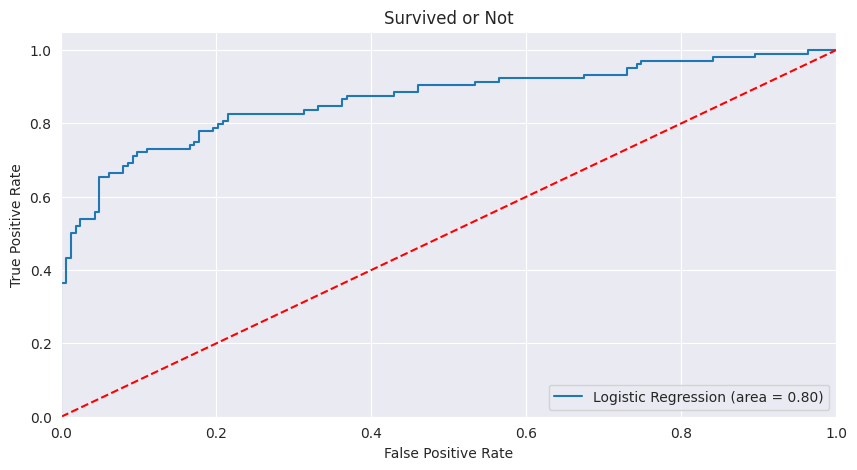

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [34]:
predicted = NBmodel.predict(X_test)

In [35]:
predicted

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

#### Evaluation of Naive Bayes

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [37]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [38]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[144  19]
 [ 33  71]]


In [40]:
print('Accuracy Score for Naive Bayes:', score2)

Accuracy Score for Naive Bayes: 0.8052434456928839


In [41]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



In [43]:
print('Auc Score for Naive Bayes:', auc2)

Auc Score for Naive Bayes: 0.7830639452571968


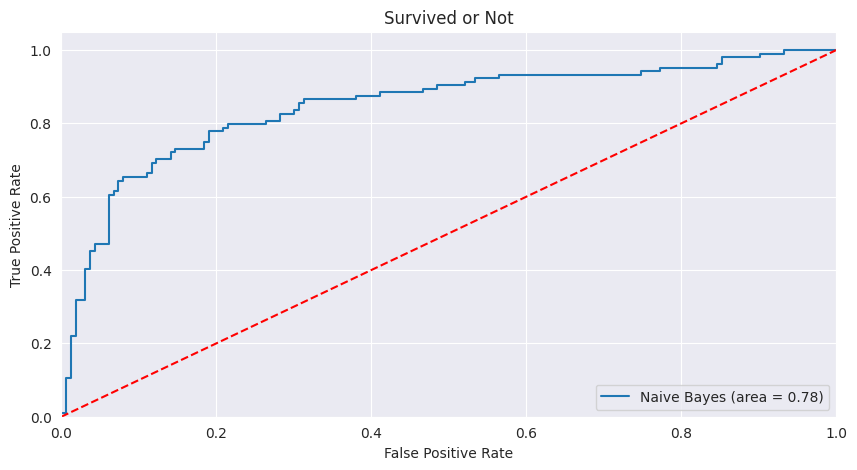

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### SVM

In [45]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [47]:
y_test

,Survived
511,0
613,0
615,1
337,1
718,0
...,...
792,0
828,1
732,0
669,1


#### Evaluation of SVM

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6217228464419475


In [49]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5789473684210527
Recall: 0.10576923076923077


In [50]:
print("Classification Report for SVM:""\n", classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.62      0.95      0.75       163
           1       0.58      0.11      0.18       104

    accuracy                           0.62       267
   macro avg       0.60      0.53      0.47       267
weighted avg       0.61      0.62      0.53       267



In [51]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [52]:
print('Confusion Matrix for SVM:''\n', cm3)

Confusion Matrix for SVM:
 [[155   8]
 [ 93  11]]


In [53]:
print('Accuracy Score for SVM:', score3)

Accuracy Score for SVM: 0.6217228464419475


In [55]:
print('Auc Score for svm:', auc3)

Auc Score for svm: 0.5283447380840018


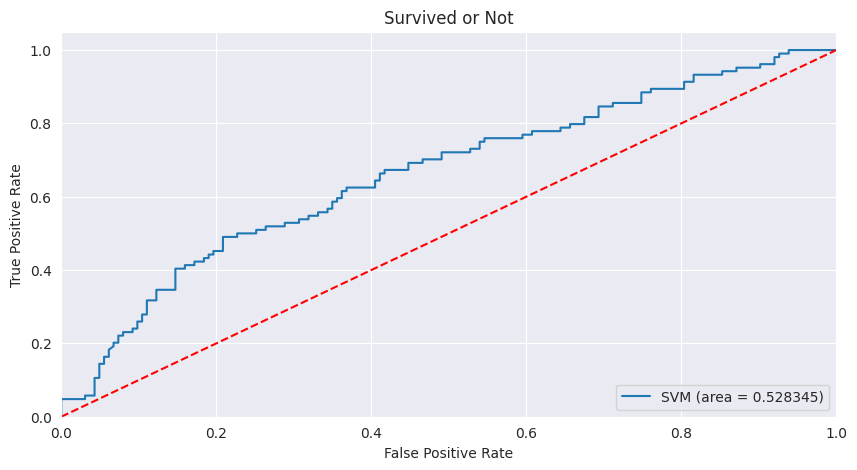

In [56]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

### Decision Tree

In [57]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluation of Desicion Tree

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7490636704119851


In [60]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       163
           1       0.67      0.69      0.68       104

    accuracy                           0.75       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.75      0.75      0.75       267



In [61]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7752808988764045


In [62]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       163
           1       0.73      0.66      0.70       104

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



### Random Forest

In [63]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
# Train the model on training data
rf.fit(X_train,y_train);

In [64]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

In [65]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [66]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       163
           1       0.80      0.68      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[131  32]
 [ 67  37]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       163
           1       0.54      0.36      0.43       104

    accuracy                           0.63       267
   macro avg       0.60      0.58      0.58       267
weighted avg       0.61      0.63      0.61       267



## Model selection

### K fold validation

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In [71]:
print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.7879416282642089
Standard deviation of CV: 0.057924808967349896


In [72]:
# extra material for k folds -> https://scikit-learn.org/stable/modules/cross_validation.html

# Case Study

**Disclaimer**: The dataset has minor modifications to protect its confidentiality.

**Description**: You are given a dataset of patients to be tested for heart disease. Features are listed below:

* **age**
* **sex** – Male, Female
* **cp** – chest pain type (4 values)
* **trestbps** – resting blood pressure
* **chol** – serum cholesterol in mg/dl
* **fbs** – fasting blood sugar > 120 mg/dl
* **restecg** – resting electrocardiographic results, values: 0, 1, 2
* **thalach** – maximum heart rate achieved
* **exang** – exercise-induced angina
* **oldpeak** – ST depression induced by exercise relative to rest
* **slope** – the slope of the peak exercise ST segment
* **ca** – number of major vessels colored by fluoroscopy, values: 0, 1, 2, 3, 4
* **thal** – values: 0, 1, 2, 3
* **target** – the column we want to predict.

You are asked to create a Support Vector Machine (with both Linear and RBF kernel) classifier, Decision Tree classifier, Random Forest classifier, Logistic Regression, Naïve Bayes classifier, and KNN classifier to predict whether patients have heart disease or not and determine which algorithm performs the best on average.

## Import libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Downloading and exploring data

In [210]:
df = pd.read_csv("heart.csv")

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [79]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Separation of data into training and test samples

In [80]:
X = df.drop("target", axis=1)
y = df["target"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training and testing model

In [83]:
models = {
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

In [86]:
results = {}
for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # Вычисляем метрики
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Сохраняем в словарь
    results[model_name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}

    # Выводим результаты
    print(f"{model_name}: Accuracy = {accuracy:.4f}, ROC AUC = {roc_auc:.4f}")

SVM (Linear): Accuracy = 0.8689, ROC AUC = 0.8685
SVM (RBF): Accuracy = 0.8689, ROC AUC = 0.8702
Decision Tree: Accuracy = 0.8361, ROC AUC = 0.8389
Random Forest: Accuracy = 0.8525, ROC AUC = 0.8513
Logistic Regression: Accuracy = 0.8525, ROC AUC = 0.8529
Naïve Bayes: Accuracy = 0.8689, ROC AUC = 0.8702
KNN: Accuracy = 0.9016, ROC AUC = 0.9030


## Analyze and select the best model

In [87]:
results_df = pd.DataFrame(results).T
print(results_df.sort_values("Accuracy", ascending=False))

                     Accuracy   ROC AUC
KNN                  0.901639  0.903017
SVM (RBF)            0.868852  0.870151
SVM (Linear)         0.868852  0.868534
Naïve Bayes          0.868852  0.870151
Logistic Regression  0.852459  0.852909
Random Forest        0.852459  0.851293
Decision Tree        0.836066  0.838901


# Home Work

**Disclaimer: This homework is created for educational purposes.**

**This dataset contains information about bank customers, where you are working as a Data Scientist. Using the given variables, you must predict whether a person earns less than $50K per year.**

**Note**: You should not use all variables. Determine which parameters will be most useful for your analysis.

**Dataset Description**:
* **age** / continuous.

* **workclass** / categorical: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* **fnlwgt** / continuous.

* **education** / categorical: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* **education-num** / continuous.

* **marital-status** / categorical: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* **occupation** / categorical: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* **relationship** / categorical: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* **race** / categorical: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* **sex** / binary: Female, Male.

* **capital-gain** / continuous.

* **capital-loss** / continuous.

* **hours-per-week** / continuous.

* **native-country** / categorical: United States, Cambodia, England, Puerto Rico, Canada, Germany, Outlying US (Guam-USVI-etc.), India, Japan, Greece, South Korea, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican Republic, Laos, Ecuador, Taiwan, Haiti, Colombia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinidad & Tobago, Peru, Hong Kong, Netherlands.

You are asked to create a Support Vector Machine (with both Linear and RBF kernel) classifier, Decision Tree classifier, Random Forest classifier, Logistic Regression, Naïve Bayes classifier, and KNN classifier to predict whether patients have heart disease or not and determine which algorithm performs the best on average.

## Import Libraries

In [164]:
pip install pandas scikit-learn matplotlib seaborn

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Модели
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Data loading

In [166]:
df = pd.read_csv("income_evaluation.csv")

In [167]:
df.columns = df.columns.str.strip()

In [168]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [170]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [171]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Target variable coding

In [172]:
income_encoded = []

for value in df['income']:
    cleaned_value = value.strip()
    if cleaned_value == '<=50K':
        income_encoded.append(0)
    else:
        income_encoded.append(1)

df['income'] = income_encoded

## Categorical feature coding

In [173]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

In [174]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## Sample generation

In [175]:
X = df.drop(['income', 'fnlwgt'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Data normalisation (for SVM and KNN)

In [176]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training and metrics collection

In [177]:
models = {
    "SVM Linear": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

In [178]:
all_results = []

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

for name, model in models.items():
    print(f"\n🧠 Training {name}...")

    # Select a dataset (normalised or raw)
    if 'SVM' in name or 'KNN' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrics collection
    all_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1 Score": f1_score(y_test, y_pred, pos_label=1)
    })

    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]

🧠 Training SVM Linear...
SVM Linear Accuracy: 0.8168
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4945
           1       0.80      0.32      0.46      1568

    accuracy                           0.82      6513
   macro avg       0.81      0.65      0.67      6513
weighted avg       0.81      0.82      0.79      6513


🧠 Training SVM RBF...
SVM RBF Accuracy: 0.8558
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.77      0.57      0.66      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513


🧠 Training Decision Tree...
Decision Tree Accuracy: 0.8194
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4945
           1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8231
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.71      0.45      0.55      1568

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513


🧠 Training Naive Bayes...
Naive Bayes Accuracy: 0.8061
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4945
           1       0.70      0.34      0.46      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.65      0.67      6513
weighted avg       0.79      0.81      0.78      6513


🧠 Training KNN...
KNN Accuracy: 0.8294
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4945
           1       0.66      0.60      0.63      1568

    accuracy                           0.83      

## Output table with results

In [179]:
results_df = pd.DataFrame(all_results).set_index("Model").sort_values("F1 Score", ascending=False)
print("\nModel results:")
print(results_df)


Model results:
                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Random Forest        0.851374   0.714592  0.637117  0.673635
SVM RBF              0.855827   0.769494  0.572704  0.656673
KNN                  0.829418   0.661713  0.596301  0.627306
Decision Tree        0.819438   0.625480  0.623087  0.624281
Logistic Regression  0.823123   0.707171  0.452806  0.552100
SVM Linear           0.816828   0.797147  0.320791  0.457481
Naive Bayes          0.806080   0.701453  0.338648  0.456774


## F1 Score visualisation

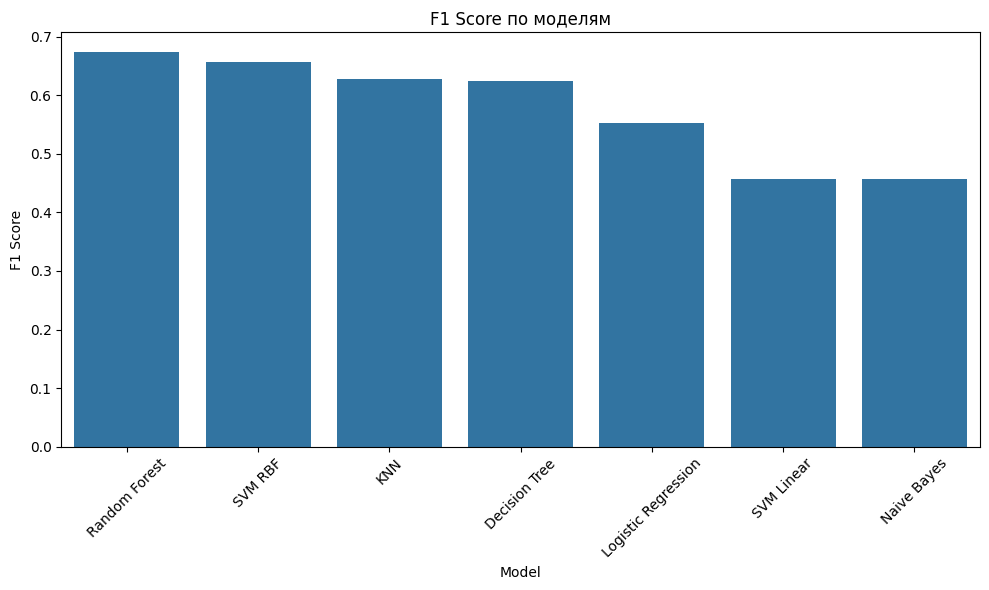

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["F1 Score"])
plt.xticks(rotation=45)
plt.title("F1 Score по моделям")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

## Correlation

In [185]:
numeric_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

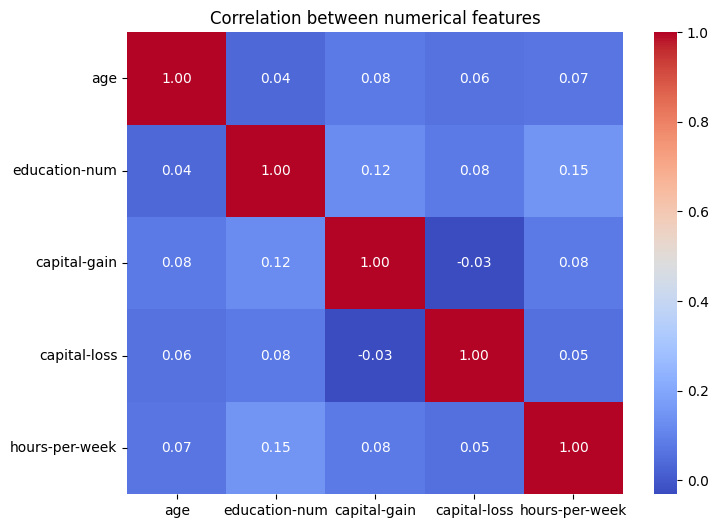

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between numerical features")
plt.show()

In [187]:
df.groupby('income')[numeric_cols].mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,
0,36.783738,9.595065,148.752468,53.142921,38.840210
1,44.249841,11.611657,4006.142456,195.001530,45.473026
